## Esercizio 05.01 - Stime di $\langle r \rangle$ con distribuzione uniforme
    

Lo scopo di questa esercitazione è di applicare l'algoritmo di Metropolis per campionare una distribuzione di probabilità relativamente complicata, come può essere la $|\psi|^2$ dell'atomo di Idrogeno nello stato fondamentale ($|n,l,m\rangle = |1,0,0\rangle$) e in uno dei primi tre stati eccitati ($|n,l,m\rangle = |2,1,0\rangle$).

Le funzioni d'onda in questione sono
$$
\psi_{1,0,0}(r,\theta,\phi) = \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} \qquad \qquad \psi_{2,1,0}(r,\theta,\phi) = \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
dove $a_0=0.529$ nm è il raggio di Bohr. Noto che in meccanica quantistica il modulo quadro della funzione d'onda di uno stato rappresenta la probabilità che il sistema si trovi in quel determinato stato, possiamo utilizzare i punti campionati per calcolare numericamente grandezze di interesse fisico, come il valor medio della distanza dell'elettrone dal centro $\langle r \rangle$. I risultati ottenuti possono essere confrontati con la soluzione analitica del problema:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\qquad \qquad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$


Abbiamo eseguito il campionamento con due diverse probabilità di transizione $T(x|y)$: uniforme (la nuova posizione proposta è estratta con probabilità uniforme da un cubo di lato $2\delta$ centrato sulla posizione attuale) e gaussiana (la nuova posizione proposta è estratta da una distribuzione di probabilità gaussiana, centrata sulla posizione attuale e con $\sigma=\delta$). Due importanti parametri per il funzionamento dell'algoritmo di Metropolis sono $\delta$ e il punto di partenza della catena di posizioni esplorate. 

#### Determinazione di $\delta$
Per determinare un buon valore per $\delta$, si è studiata la dipendenza dell'accettazione $A$ da tale parametro. La condizione che si vuole ottenere è che $A$ (il numero di volte che una mossa proposta viene accettata diviso per il totale di mosse proposte) sia $\approx 50\%$: questo (regola empirica del $50\%$) permette di avere una successione di punti con correlazione non troppo alta, mantenendo tuttavia una discreta efficienza computazionale. Vengono di seguito graficati i valori di accettazione (calcolati su un random walk di $2\times10^3$ mosse) in funzione della $\delta$ per le due densità di probabilità e le due probabilità di transizione considerate.

È da notare che questo tipo di analisi dipende (tanto più quanto il numero di passi del random walk è ridotto) dal punto di partenza considerato: abbiamo in tutti i casi scelto come punto di partenza quello successivamente utilizzato per le simulazioni principali. 

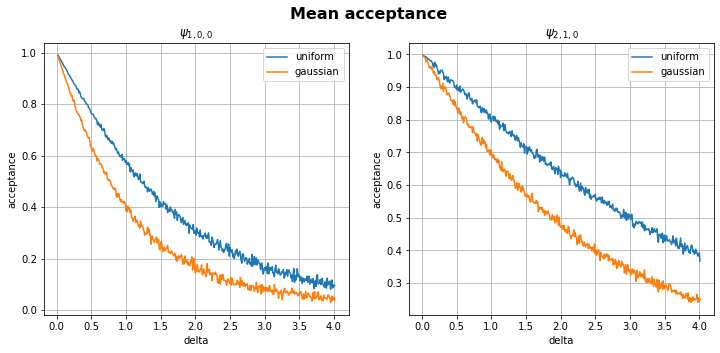

In [1]:
import matplotlib.pyplot as plt
import numpy as np

delta, u100, g100, u210, g210 = np.loadtxt('acceptance-delta.dat',unpack=True,usecols=(0,3,4,5,6))

plt.figure(figsize=(12,5))
plt.suptitle('Mean acceptance',fontweight='bold', fontsize=16)

plt.subplot(121)
plt.plot(delta,u100,label='uniform')
plt.plot(delta,g100,label='gaussian')
plt.legend()
plt.xlabel('delta')
plt.ylabel('acceptance')
plt.title('$\psi_{1,0,0}$')
plt.grid(True)

plt.subplot(122)
plt.plot(delta,u210,label='uniform')
plt.plot(delta,g210,label='gaussian')
plt.legend()
plt.xlabel('delta')
plt.ylabel('acceptance')
plt.title('$\psi_{2,1,0}$')
plt.grid(True)

plt.show()



Abbiamo pensato inoltre di implementare un metodo AutoSetDelta (membro della classe che rappresenta il punto spostato secondo l'algoritmo di Metropolis), che confronta l'accettazione media per diversi valori di $\delta$, per impostare automaticamente un valore soddisfacente.
I valori di $\delta$ ottenuti con il metodo SetDelta sono 
- $\delta_{1,0,0} = 1.1$
- $\delta_{2,1,0} = 2.9$

per la distribuzione uniforme e 
- $\delta_{1,0,0} = 0.8$
- $\delta_{2,1,0} = 1.8$

per la distribuzione gaussiana. 


#### Punto di partenza del'algoritmo ed equilibrazione
Il punto di partenza della successione è in ciascuno dei due casi un punto dello spazio cartesiano in cui il valor medio di $r$ corrisponde al valore di aspettazione pesato su ciascuna distribuzione di probabilità:
- $\mathbf{x}^{start}_{1,0,0} = (3/2,0,0) $
- $\mathbf{x}^{start}_{2,1,0} = (0,0,-5) $

dove tutte le lunghezze sono espresse in unità di $a_0$, che è un ordine di grandezza tipico delle dimensioni atomiche.

Questo accorgimento è necessario perché l'algoritmo di Metropolis campiona solo asintoticamente la distribuzione desiderata, e se si imposta un punto di partenza in cui la probabilità di trovare la particella è bassa si ha una fase transiente in cui il campionamento è inefficace (se la probabilità è bassa nel punto di partenza, nella fase iniziale della simulazione la zona corrispondente al punto d'inizio sarà campionata più di quanto dovrebbe). Si pò osservare questo effetto in un grafico del valore di $r$ dei punti generati: partendo ben lontani dal valore di aspettazione della variabile, si ha una fase di transizione che porta all'equilibrio, in cui i punti campionati sono più spesso vicini al valore di aspettazione.

In tutti i casi si è scelto come punto di partenza per lo studio dell'equilibrazione $10\mathbf{x}^{start}_{n,l,m}$

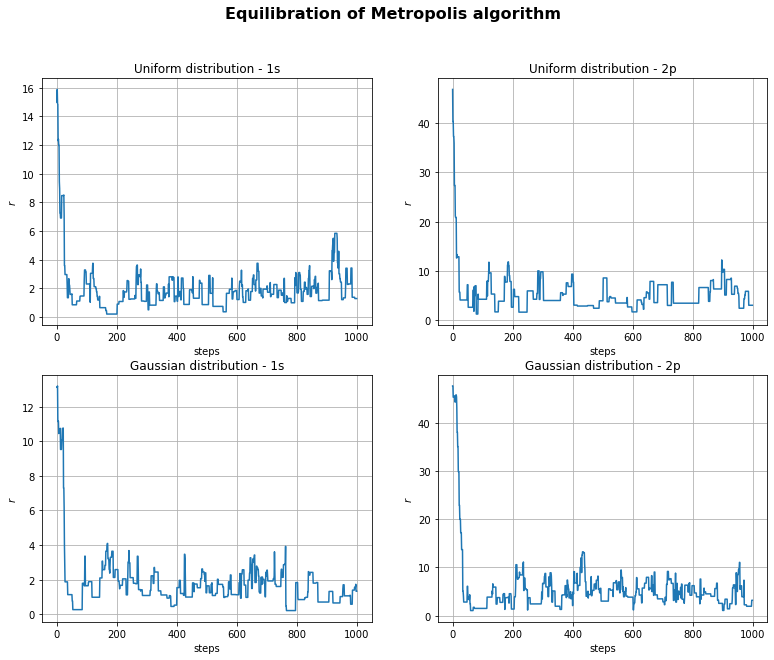

In [2]:
import matplotlib.pyplot as plt
import numpy as np

u100 = np.loadtxt('output/equilibrationU100.dat')
u210 = np.loadtxt('output/equilibrationU210.dat')
g100 = np.loadtxt('output/equilibrationG100.dat')
g210 = np.loadtxt('output/equilibrationG210.dat')
x    = np.arange(u100.size)

plt.figure(figsize=(13,10))
plt.suptitle('Equilibration of Metropolis algorithm',fontweight='bold',fontsize=16)

plt.subplot(221)
plt.plot(x,u100)
plt.title('Uniform distribution - 1s')
plt.xlabel('steps')
plt.ylabel('$r$')
plt.grid(True)

plt.subplot(222)
plt.plot(x,u210)
plt.title('Uniform distribution - 2p')
plt.xlabel('steps')
plt.ylabel('$r$')
plt.grid(True)

plt.subplot(223)
plt.plot(x,g100)
plt.title('Gaussian distribution - 1s')
plt.xlabel('steps')
plt.ylabel('$r$')
plt.grid(True)

plt.subplot(224)
plt.plot(x,g210)
plt.title('Gaussian distribution - 2p')
plt.xlabel('steps')
plt.ylabel('$r$')
plt.grid(True)

plt.show()

## Stime di $\langle r \rangle$ con distribuzione uniforme
Riportiamo i dati ottenuti, divisi in $100$ blocchi da $10^4$ valori ciascuno.

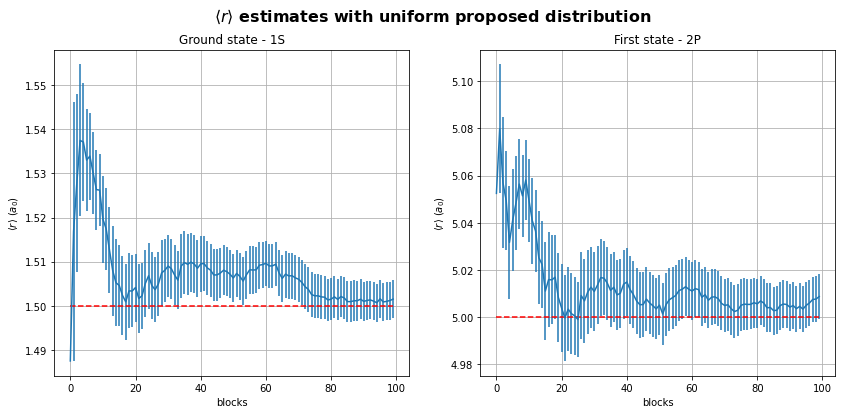

In [3]:
import matplotlib.pyplot as plt
import numpy as np

r100, err100 = np.loadtxt('output/Umean_r_100.dat',unpack=True,usecols=(0,1))
r210, err210 = np.loadtxt('output/Umean_r_210.dat',unpack=True,usecols=(0,1))
X = np.arange(r100.size)
exp100, exp210 = np.ones(X.size)*1.5, np.ones(X.size)*5.

plt.figure(figsize=(14,6))
plt.suptitle(r'$\langle r\rangle$ estimates with uniform proposed distribution',weight='bold',fontsize=16)

plt.subplot(121)
plt.errorbar(X,r100,err100)
plt.plot(X,exp100,'r--')
plt.grid(True)
plt.title('Ground state - 1S')
plt.xlabel('blocks')
plt.ylabel(r'$\langle r \rangle$ ($a_0$)')

plt.subplot(122)
plt.errorbar(X,r210,err210)
plt.plot(X,exp210,'r--')
plt.grid(True)
plt.title('First state - 2P')
plt.xlabel('blocks')
plt.ylabel(r'$\langle r \rangle$ ($a_0$)')



plt.show()

## Stime di $\langle r \rangle$ con distribuzione Gaussiana
Anche in questo caso i $10^6$ valori ottenuti sono divisi in $100$ blocchi.

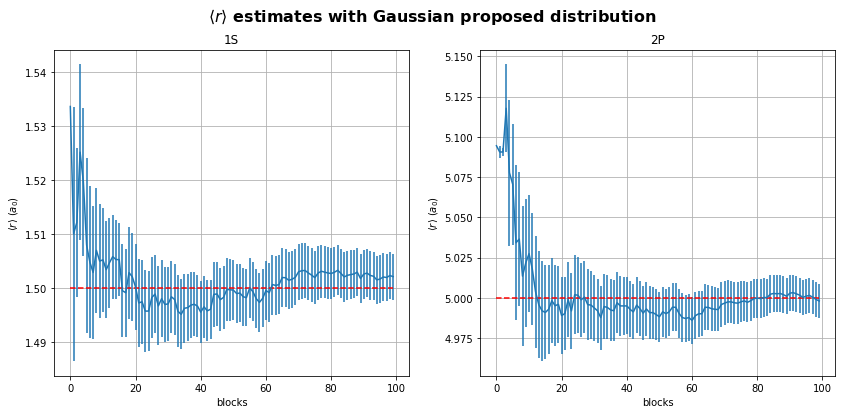

In [4]:
import matplotlib.pyplot as plt
import numpy as np

r100, err100 = np.loadtxt('output/Gmean_r_100.dat',unpack=True,usecols=(0,1))
r210, err210 = np.loadtxt('output/Gmean_r_210.dat',unpack=True,usecols=(0,1))
X = np.arange(r100.size)
exp100, exp210 = np.ones(X.size)*1.5, np.ones(X.size)*5.

figure, (r100plot,r210plot) = plt.subplots(ncols=2,figsize=(14,6))

r100plot.errorbar(X,r100,err100)
r210plot.errorbar(X,r210,err210)

r100plot.plot(X,exp100,'r--')
r210plot.plot(X,exp210,'r--')

r100plot.grid(True)
r210plot.grid(True)

r100plot.set_title('1S')
r210plot.set_title('2P')

r100plot.set_xlabel('blocks')
r210plot.set_xlabel('blocks')

r100plot.set_ylabel(r'$\langle r \rangle$ ($a_0$)')
r210plot.set_ylabel(r'$\langle r \rangle$ ($a_0$)')

figure.suptitle(r'$\langle r\rangle$ estimates with Gaussian proposed distribution', weight='bold',fontsize=16)

plt.show()

La scelta di una distribuzione proposta gaussiana o uniforme non sembra influenzare i risultati, che sono compatibili con il valore di aspettazione teorico.

## Visualizzazione punti campionati

E' interessante osservare in uno spazio tridimensionale la distribuzione dei punti generata, che è proporzionale a $|\psi|^2$ per il rispettivo stato. Sono qui rappresentati un punto ogni 100 simulati.

/tmp/ipykernel_66121/3361295189.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


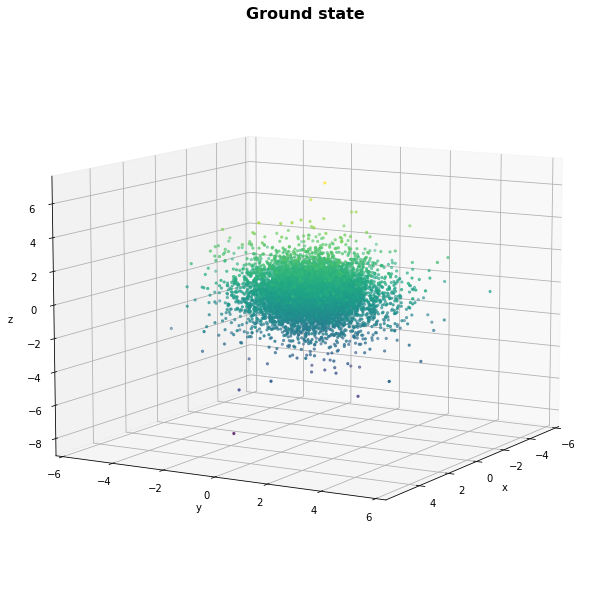

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


X, Y, Z = np.loadtxt('output/Upoints100.dat',usecols=(0,1,2),unpack=True)

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('Ground state',fontweight='bold',fontsize=16)
plt.show()

/tmp/ipykernel_66121/1683696232.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


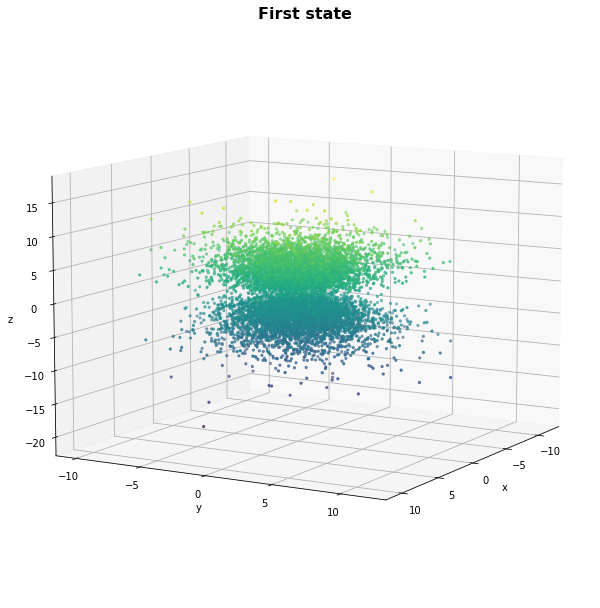

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


X, Y, Z = np.loadtxt('output/Upoints210.dat',usecols=(0,1,2),unpack=True)

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.set_title('First state',fontweight='bold',fontsize=16)
plt.show()

Si intuisce in questa rappresentazione la caratteristica forma dell'orbitale $p$, con i due lobi opposti.